<a href="https://colab.research.google.com/github/francomanca93/analisis-de-datos/blob/proyecto/Proyecto_Cambio_clim%C3%A1tico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Poryecto: Cambio climatico

## Iniciando una rutina típica de manejo de datos

En este proyecto se verá como analizar los datasets mediante una rutina practica en donde utilizaremos las funciones aprendidas.  

Una vez obtenidos los datos hay que hacer preprocesamiento y limpieza de datos, consolidar los archivos en una base simple de analisis y extraer los insight. Para los insights utilizaremos siempre gráficas.

Utilizaremos una base de datos que habla sobre el cambio climatico, obtenida de Kaggle. Esta se llama [Global Land Temperature by Country](https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data?select=GlobalLandTemperaturesByCountry.csv). 

### Configuramos Google Colab y librerias

En este caso configuramos google colab, pero si trabajasemos con Jupyter Notebook deberiamos configurar nuestro ambiente de trabajo.


In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
%cd '/content/drive/My Drive/Colab Notebooks/analisis-de-datos-con-pandas/db/Proyecto'
!ls

/content/drive/My Drive/Colab Notebooks/analisis-de-datos-con-pandas/db/Proyecto
GlobalLandTemperaturesByCountry.csv


In [3]:
import pandas as pd
import numpy as np

### Conociendo nuestro dataframe

Leemos nuestro dataset, lo guardamos en una variable para luego reconocer las labels que tiene el dataframe.

In [4]:
df_temp = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
df_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


Tenemos columnas con los nombres de los paises, temperaturas promedio, fechas. Tambien observamos que hay datos nulos NaN. Estos se deberán ir limpiando a medida que avancemos en nuestro código.

Veamos el tamaño de la base de datos

In [5]:
df_temp.shape

(577462, 4)

Veamos como esta compuesta nuestra base de datos, analizando mas informacion de la misma

In [6]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


Veamos los paises que tiene nuestra base de datos. 

In [7]:
df_temp['Country'].unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecu

### Mejorando nuestro dataframe

Mejoremos el formato de nuestra base de datos. En este caso creemos una variable de tipo tiempo, de nuestra columna de tiempo.

In [8]:
df_temp['year'] = pd.to_datetime(df_temp['dt'])
df_temp['year']

0        1743-11-01
1        1743-12-01
2        1744-01-01
3        1744-02-01
4        1744-03-01
            ...    
577457   2013-05-01
577458   2013-06-01
577459   2013-07-01
577460   2013-08-01
577461   2013-09-01
Name: year, Length: 577462, dtype: datetime64[ns]

Veamos ahora la nueva variable creada y el tipo de dato que es la misma.

In [9]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt                             577462 non-null  object        
 1   AverageTemperature             544811 non-null  float64       
 2   AverageTemperatureUncertainty  545550 non-null  float64       
 3   Country                        577462 non-null  object        
 4   year                           577462 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 22.0+ MB


Tenemos muchas filas, las cuales no aporten un valor significativo a nuestro análisis, en este caso. Lo que haremos es aplicarle un filtro al dataframe y obtener las fechas mayores al año 1970. 

In [10]:
idx = df_temp['year'] > pd.to_datetime('1970-01-01')
df_temp = df_temp[idx]
df_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
2715,1970-02-01,-10.835,0.478,Åland,1970-02-01
2716,1970-03-01,-1.583,0.608,Åland,1970-03-01
2717,1970-04-01,0.493,0.463,Åland,1970-04-01
2718,1970-05-01,6.939,0.565,Åland,1970-05-01
2719,1970-06-01,14.252,0.676,Åland,1970-06-01
...,...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe,2013-05-01
577458,2013-06-01,17.613,0.473,Zimbabwe,2013-06-01
577459,2013-07-01,17.000,0.453,Zimbabwe,2013-07-01
577460,2013-08-01,19.759,0.717,Zimbabwe,2013-08-01


Vemos que teniamos unas **577.462,00** filas en el dataframe original y con este filtro lo hemos reducido a **127.332,00**. Ahora nuestro dataframe comienza en 1970, esto pasa para todos los paises.

### Agrupando datos y graficando

Agrupemos por fecha y por pais, para encontrar un promedio anual de la temperatura. Calcularemos la media y la mediana para cada fecha por pais. 

In [11]:
df_t_avg = df_temp.groupby(['Country',
                            pd.Grouper(key='year', freq='1Y') 
                            ]).agg({'AverageTemperature': [np.mean, np.median]})
df_t_avg

AverageTemperature         
                                     mean   median
Country     year                                  
Afghanistan 1970-12-31          16.005455  16.1990
            1971-12-31          14.823500  14.9340
            1972-12-31          12.547167  13.8725
            1973-12-31          14.235500  14.9130
            1974-12-31          13.316750  13.6160
...                                   ...      ...
Åland       2009-12-31           6.489083   5.5765
            2010-12-31           4.861917   4.7550
            2011-12-31           7.170750   7.4990
            2012-12-31           6.063917   6.2540
            2013-12-31           6.229750   6.0140

[10692 rows x 2 columns]

Seleccionemos algun pais y grafiquemos los datos.

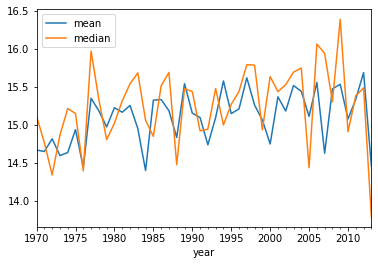

In [12]:
df_t_avg.xs('Argentina')['AverageTemperature'].plot()

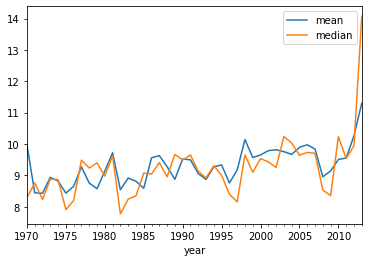

In [13]:
df_t_avg.xs('United States')['AverageTemperature'].plot()

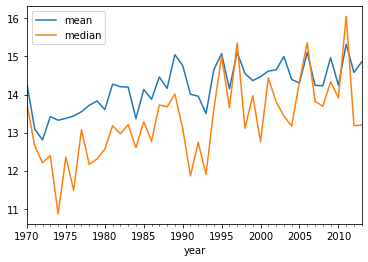

In [14]:
df_t_avg.xs('Spain')['AverageTemperature'].plot()

Vemos una clara tendencia alcista en todos los paises que estudiamos. Esto quiere decir que la temperatura siempre va en aumento.

Preferiblemente es mejor trabajar con la mediana ya que no recibe sesgos por valores atipicos o fuera de rangos. Con esto haremos un dataset de mas facil manipulacion utilizando esta variable estadistica unicamente.

In [15]:
df_t_med = df_t_avg['AverageTemperature'][['median']].reset_index()
df_t_med

,Country,year,median
0,Afghanistan,1970-12-31,16.1990
1,Afghanistan,1971-12-31,14.9340
2,Afghanistan,1972-12-31,13.8725
3,Afghanistan,1973-12-31,14.9130
4,Afghanistan,1974-12-31,13.6160
...,...,...,...
10687,Åland,2009-12-31,5.5765
10688,Åland,2010-12-31,4.7550
10689,Åland,2011-12-31,7.4990
10690,Åland,2012-12-31,6.2540


De la fecha, no interesa extraer el año para hacer mas facil nuestro estudio anual posterior

In [16]:
df_t_med['date'] = df_t_med['year'].dt.year
df_t_med['date']

0        1970
1        1971
2        1972
3        1973
4        1974
         ... 
10687    2009
10688    2010
10689    2011
10690    2012
10691    2013
Name: date, Length: 10692, dtype: int64

Renombremos algunas columnas y para no tener que reasignar al dataframe utilicemos el parametro **inplace**

In [17]:
df_t_med.rename(columns={'median': 'temperature'}, inplace=True)
df_t_med

,Country,year,temperature,date
0,Afghanistan,1970-12-31,16.1990,1970
1,Afghanistan,1971-12-31,14.9340,1971
2,Afghanistan,1972-12-31,13.8725,1972
3,Afghanistan,1973-12-31,14.9130,1973
4,Afghanistan,1974-12-31,13.6160,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.5765,2009
10688,Åland,2010-12-31,4.7550,2010
10689,Åland,2011-12-31,7.4990,2011
10690,Åland,2012-12-31,6.2540,2012


Si queremos explorar un poco la composicion de temperaturas por pais, podemos utilizar un **boxplot**, herramienta muy util para encontrar la distribucion de las variables. Pero tenemos que hacer algunas modificaciones en nuestro dataframe.

In [18]:
df_t_pivot = df_t_med.pivot_table(values='temperature', index='date', columns='Country')
df_t_pivot.head(10)

Country,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua And Barbuda,Argentina,Armenia,Aruba,Asia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Baker Island,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,"Bonaire, Saint Eustatius And Saba",Bosnia And Herzegovina,Botswana,Brazil,British Virgin Islands,Bulgaria,Burkina Faso,Burma,Burundi,Cambodia,Cameroon,Canada,Cape Verde,...,South America,South Georgia And The South Sandwich Isla,South Korea,Spain,Sri Lanka,Sudan,Suriname,Svalbard And Jan Mayen,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor Leste,Togo,Tonga,Trinidad And Tobago,Tunisia,Turkey,Turkmenistan,Turks And Caicas Islands,Uganda,Ukraine,United Arab Emirates,United Kingdom,United Kingdom (Europe),United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,Western Sahara,Yemen,Zambia,Zimbabwe,Åland
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1970,16.1990,25.2360,12.4230,23.2840,26.7180,11.6390,22.9640,27.1510,27.2240,15.1150,11.1180,28.6180,8.6480,21.9360,6.3550,12.4300,25.6190,27.4460,25.5650,27.9370,27.0110,6.5360,10.6590,26.4620,27.0670,13.1690,21.9350,28.3010,10.0870,23.4400,25.4440,26.7220,11.5200,28.1070,25.7410,19.9750,27.1040,24.4220,-1.6320,24.7480,...,22.6690,1.2720,14.4880,13.7550,27.6430,28.3390,26.4830,-5.8620,19.2560,3.2700,7.4020,19.4770,24.2230,6.4740,22.3660,26.8520,26.8290,27.0600,23.6180,26.4450,20.1740,12.9030,17.4190,26.8910,22.8360,10.0670,28.9860,9.7340,9.9730,8.2860,15.7640,15.5410,25.2780,24.6330,26.7220,23.8210,27.4390,22.1330,23.2560,6.9340
1971,14.9340,24.7755,11.6735,22.7810,26.4845,11.9275,22.4615,26.5295,26.3810,14.7665,8.6390,28.0850,8.1845,22.2985,7.1385,10.7060,25.4960,25.5135,25.3280,26.3180,26.4790,5.7755,10.0065,25.2630,26.9295,12.6415,21.2455,27.2900,10.1885,23.9550,24.9120,26.2470,9.5820,27.9310,24.7345,19.6260,27.0150,24.0725,-3.4755,23.6530,...,21.9110,1.5420,11.9565,12.6455,27.1535,27.9145,25.8920,-10.5280,19.5295,1.6720,8.5215,17.1220,22.1795,5.8390,22.3920,26.6300,26.4135,26.3805,23.8420,26.0095,19.6470,10.6395,14.9685,26.7755,22.7355,7.4325,27.8175,8.7785,8.9780,8.7545,16.5470,12.9860,24.6480,24.1105,26.2470,20.2715,26.5130,21.8265,22.7055,4.4870
1972,13.8725,25.1230,11.2175,22.4985,26.8205,10.0250,22.6070,26.9150,26.7700,14.3445,11.4950,28.6780,8.6445,22.3470,5.3755,13.6880,25.8145,26.3535,26.0285,26.9035,27.0225,6.0925,8.7840,25.8145,26.7025,12.5800,21.9525,27.8050,9.7260,23.0225,25.1430,26.6150,10.6495,28.2305,25.4830,20.0425,27.2160,24.1850,-6.6775,23.6670,...,22.3110,0.4455,12.5585,12.2105,27.4820,28.9775,26.1590,-5.9665,19.9670,2.2865,6.1615,19.4300,23.0640,4.9110,22.6910,26.9205,26.2535,27.0445,23.2235,26.4690,18.6385,13.2440,16.3415,27.1115,23.2850,9.0295,28.0485,8.6235,8.7990,8.2290,16.9190,13.5640,25.2615,24.5165,26.6150,21.3905,26.8175,21.9800,22.3980,5.6200
1973,14.9130,25.3445,11.8370,22.9975,27.0120,9.5525,23.0730,27.3360,27.1725,14.8675,9.7335,28.1630,8.5830,22.9775,4.5905,11.8825,25.5835,27.0690,25.9215,27.1555,26.8725,5.7910,8.0960,26.4840,27.3385,13.5435,22.4190,27.7220,9.3100,23.6135,25.2795,27.0685,10.5565,28.4860,25.4180,20.2410,27.4025,24.6665,-3.6645,24.5360,...,22.4800,1.6770,12.8265,12.3910,27.5945,28.6225,26.4350,-9.6135,18.8930,0.4795,5.1230,18.9260,23.2600,5.5885,22.7820,26.9290,27.0445,26.9310,23.9020,26.4575,19.6385,12.1315,15.8780,26.8120,23.0450,8.5070,28.7285,7.4480,7.5175,8.8785,17.5420,13.4735,25.2020,25.0080,27.0685,22.9215,27.2265,22.1090,22.5815,3.5795
1974,13.6160,24.8260,11.3210,21.5795,26.6350,8.2045,22.3275,26.6015,26.5190,15.2160,9.3265,27.7935,8.3875,21.6105,5.1555,11.6075,25.2450,26.3585,25.4955,27.2765,26.7885,6.1085,8.3310,25.6020,26.7790,14.0195,21.2395,27.3970,8.3580,22.0050,24.7665,26.1720,10.4035,27.0055,25.5345,19.8995,27.2265,24.0195,-6.0400,23.3540,...,21.8890,1.4885,12.2490,10.8630,27.2295,28.1990,25.8925,-7.0340,19.3190,2.4690,5.4260,19.1350,22.9360,5.6675,22.3410,26.7550,26.4965,26.4465,23.8720,26

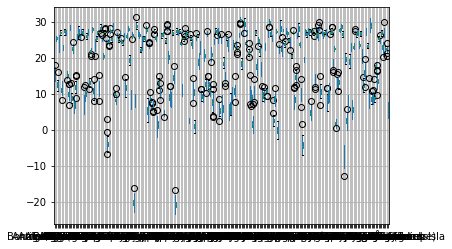

In [19]:
df_t_pivot.boxplot()

La grafica esta llena de puntos y debido a que son mucho paises, es dificil de interpretar la grafica.  Lo que podemos hacer es seleccionar una determinada cantidad de paises para poder hacer una mejor interpretacion. Seleccionemos paises aleatorios con **sample**

In [20]:
df_t_pivot.sample(2)

Country,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua And Barbuda,Argentina,Armenia,Aruba,Asia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Baker Island,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,"Bonaire, Saint Eustatius And Saba",Bosnia And Herzegovina,Botswana,Brazil,British Virgin Islands,Bulgaria,Burkina Faso,Burma,Burundi,Cambodia,Cameroon,Canada,Cape Verde,...,South America,South Georgia And The South Sandwich Isla,South Korea,Spain,Sri Lanka,Sudan,Suriname,Svalbard And Jan Mayen,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor Leste,Togo,Tonga,Trinidad And Tobago,Tunisia,Turkey,Turkmenistan,Turks And Caicas Islands,Uganda,Ukraine,United Arab Emirates,United Kingdom,United Kingdom (Europe),United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,Western Sahara,Yemen,Zambia,Zimbabwe,Åland
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1986,15.1815,25.173,13.3720,23.5470,27.1245,10.990,22.8715,26.844,26.6995,15.5155,10.570,28.0475,8.613,22.258,7.1915,12.4225,26.0135,27.4740,25.6205,26.534,26.946,6.840,9.7240,25.5525,26.7085,11.8370,22.0620,27.610,11.386,23.325,25.3650,26.468,11.4375,28.079,24.7745,20.144,27.042,24.1695,-4.8195,23.9395,...,22.5275,1.5435,12.2235,12.7690,27.560,28.456,26.352,-7.9930,19.8690,2.2540,7.0035,19.7205,22.6770,5.5895,22.9225,26.8110,26.4585,26.565,22.8320,26.3620,20.4205,12.823,15.7825,26.9835,23.496,9.0475,28.7965,8.5325,8.6855,9.0425,17.937,13.3115,25.1655,24.6800,26.468,22.1385,26.2835,22.2760,22.4890,6.4775
1984,14.4185,25.294,12.7785,23.3215,26.8765,10.231,23.0485,26.873,26.6555,15.0610,9.481,28.2350,7.863,22.342,6.5885,11.6855,25.2615,26.6575,25.4225,27.354,26.800,8.338,9.5375,25.9700,27.1945,13.9775,22.0595,27.467,10.840,24.366,25.3015,26.705,11.2590,28.571,25.0275,20.364,26.838,24.2640,-3.2890,24.6420,...,22.3715,1.2355,12.3465,12.6025,27.113,29.230,26.119,-4.1095,19.5585,3.5675,6.7965,18.2125,22.6005,5.0195,22.7115,26.7395,26.3165,26.993,23.6155,26.2045,19.2540,11.696,15.6185,26.8415,23.175,9.3965,28.0750,8.3550,8.5465,8.3445,17.743,13.1145,25.0260,24.6625,26.705,22.3915,26.5425,22.5665,23.3255,6.7930


Como vemos se han seleccionados aleatoriamente los años y no los paises. Lo que podemos hacer antes es una transpuesta de nuestro dataframe, seleccionar aleatoriamente los paises y luego transponer nuevamente.

In [21]:
df_t_pivot.T.sample(2)

date,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Somalia,27.551,27.0480,27.6805,27.3025,27.0330,26.6215,26.8750,27.2960,27.6440,27.4260,27.7235,27.317,27.6245,27.962,27.1805,27.2905,27.2145,27.688,27.8455,27.1805,27.385,27.2130,27.2955,27.131,27.692,27.511,27.2115,27.7240,27.7440,27.7885,27.7555,27.6815,27.670,28.0075,27.7690,27.8565,28.2700,27.7400,27.6965,28.5185,28.1935,28.5165,27.9305,28.124
Netherlands (Europe),10.764,9.2915,8.3330,7.6120,8.0515,8.0275,9.1835,9.2775,8.8645,8.9615,8.4620,8.464,9.5710,9.426,9.1930,9.3375,9.6930,9.927,9.4315,10.1300,10.077,8.9655,8.1130,9.834,9.430,10.566,9.5680,8.5315,9.2875,10.0395,10.4845,10.7395,9.216,8.6020,10.6715,11.0890,11.3515,11.1185,9.2260,10.9670,9.6160,11.8310,9.1990,9.414


In [22]:
df_t_pivot.T.sample(2).T.head(5)

Country,Sudan,Aruba
date,,
1970,28.3390,28.6180
1971,27.9145,28.0850
1972,28.9775,28.6780
1973,28.6225,28.1630
1974,28.1990,27.7935


Sobre los datos anteriores obtengamos las graficas. Tengamos en cuenta que cada vez que corramos la linea de codigo se seleccionaran nuevamente los paises de forma aleatoria. 

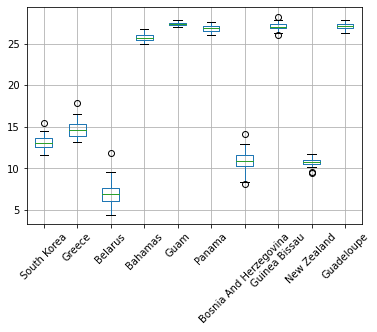

In [23]:
df_t_pivot.T.sample(10).T.boxplot(rot=45)

Lo que vimos es como a traves de un preprocesamiento y ordenamiento de las variables podiamos extraer insight de nuestra base de datos. 

Entendimos como ha variado la temperatura en los ultimos años por cada pais. Gracias a los boxplot podemos ver como la temperatura difiere dependiendo el pais en sí.

En la siguiente seccion seguiremos con el mismo set de datos y utilizaremos otros, para ver las variables que pueden impactar en el cambio climatico. Estas variables que vamos a considerar son:
* Deforestacion
* CO2
* Poblacion
* Otras.